In [1]:
# !pip install fbprophet --use-feature=2020-resolver

In [1]:
from fbprophet import Prophet

import pandas as pd
import numpy as np
from utils import get_ETRete_clear

from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()

from preprocessing import select_df_columns, df_interpolate_and_dropna
from models import evaluate_model


In [2]:
%%time
path = "data/PotenzaTermicaOraria.csv"
df = get_ETRete_clear(path)

Wall time: 26 s


In [38]:
df_train = df[["ET Rete"]][:"2019-09"]
df_test = df[["ET Rete"]]["2019-10":]

In [39]:
# df_train["ET Rete"] = ssc.fit_transform(df_train)
# df_test["ET Rete"] = ssc.transform(df_test.values.reshape(-1,1))

<AxesSubplot:xlabel='Orario'>

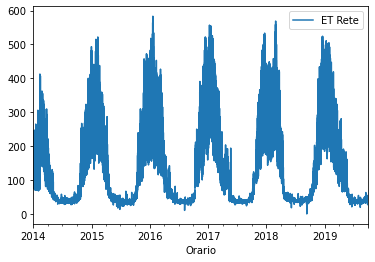

In [40]:
df_train.plot()

<AxesSubplot:xlabel='Orario'>

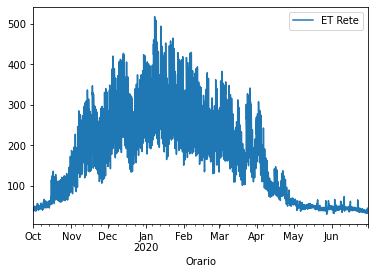

In [41]:
df_test.plot()

In [42]:
df_train_prophet = df_train.reset_index()
df_train_prophet.columns = ['ds', 'y']

In [43]:
%%time
model_orig = Prophet(growth='linear',
                    changepoints=None,
                    n_changepoints=25,
                    changepoint_range=0.8,
                    yearly_seasonality='auto',
                    weekly_seasonality='auto',
                    daily_seasonality='auto',
                    holidays=None,
                    seasonality_mode='additive',
                    seasonality_prior_scale=10.0,
                    holidays_prior_scale=10.0,
                    changepoint_prior_scale=0.05,
                    mcmc_samples=0,
                    interval_width=0.8,
                    uncertainty_samples=1000,
                    stan_backend=None)

Wall time: 5 ms


In [44]:
%%time
model = Prophet(#yearly_seasonality=True, 
                #weekly_seasonality=True, 
                #daily_seasonality=True
)
# model.add_seasonality(name='daily', period=24, fourier_order=20)

Wall time: 4 ms


In [45]:
%%time
model.fit(df_train_prophet)

Wall time: 6min 12s


In [60]:
periods = 24*2

In [61]:
future = model.make_future_dataframe(periods=periods, freq='H', include_history=False)

In [62]:
%%time
test_predictions = model.predict(future)

Wall time: 1.3 s


In [63]:
# y_true = ssc.inverse_transform(df_test['ET Rete'].iloc[:periods])
y_true = df_test['ET Rete'].loc["2020":].iloc[:periods]

In [64]:
# y_pred = ssc.inverse_transform(test_predictions['yhat'])
y_pred = test_predictions['yhat']

<AxesSubplot:>

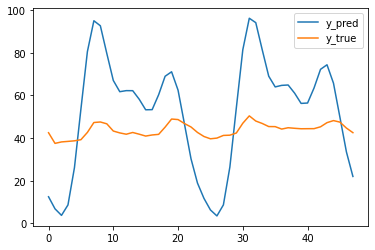

In [65]:
pd.DataFrame(np.concatenate((y_pred.values.reshape(-1,1), y_true.values.reshape(-1,1)), axis=1), columns=["y_pred", "y_true"]).plot()

In [66]:
evaluate_model(y_true.values.flatten(), y_pred.values.flatten())

mse = 670.6691244989365
r2_score = -67.17492011147242
mape = 53.6560357771067
mae = 23.448008988407665


#########################################################################

<AxesSubplot:>

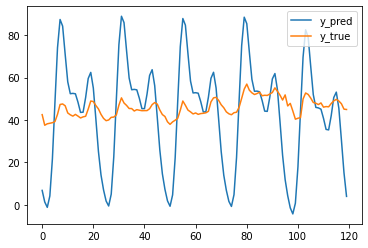

In [27]:
pd.DataFrame(np.concatenate((y_pred.values.reshape(-1,1), y_true.values.reshape(-1,1)), axis=1), columns=["y_pred", "y_true"]).plot()

In [28]:
evaluate_model(y_true.values.flatten(), y_pred.values.flatten())

mse = 538.0496895644093
r2_score = -28.0528677046172
mape = 41.374739437883704
mae = 18.463289541401814


In [67]:
from datetime import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")

In [68]:
now

'20210609084908'

In [70]:
# import json
# from prophet.serialize import model_to_json, model_from_json

# with open(f'models/final/{now}_prophet_std.json', 'w') as fout:
#     json.dump(model_to_json(model), fout)